In [ ]:
# Iván Andrés Trujillo Abella
# ivantrujillo1229@gmail.com

In [ ]:
!pip install imbalanced-learn

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler


def Xy(df,target):
    """
    Split the data in X,y to ML implementations
    """
    X = df.loc[ : , df.columns != target]
    y = df[target].astype('int')
    return X,y


In [ ]:
url = "https://raw.githubusercontent.com/it-ces/Datasets/main/basesuper.csv"

In [ ]:
df = pd.read_csv(url)

# Build financial ratios...
features = ['Activos corrientes totales', 'Pasivos corrientes totales' , 'Ganancia bruta', 'Patrimonio total', 'Total pasivos', 'Total de patrimonio y pasivos', 'y']
df = df[features]
df.dropna(inplace=True)
df['razon_corriente']=  df['Activos corrientes totales'] / df['Pasivos corrientes totales']
df['rentabilidad_patrimonio'] = df['Ganancia bruta'] / df['Patrimonio total']
df['endeudamiento'] = df['Total pasivos'] / df[ 'Total de patrimonio y pasivos']
df['short_run_apalancamiento'] = df['Pasivos corrientes totales'] / df['Patrimonio total']

featuresy = ['razon_corriente', 'rentabilidad_patrimonio', 'endeudamiento' ,'short_run_apalancamiento' ,'y']
df = df[featuresy]
df.dropna(inplace=True)


import pandas as pd
import numpy as np

def clean(df):
    index = ~df.isin([ np.inf, -np.inf]).any(axis=1)
    return df[index].astype(np.float64)

df = clean(df)

X,y = Xy(df, 'y')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 666, stratify=y)

# Undersampling
rus = RandomUnderSampler(random_state=1234)
X_train, y_train = rus.fit_resample(X_train, y_train)

<ipython-input-7-1ea90882a48e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
clf  = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_proba = clf.predict_proba(X_test)

In [ ]:
clf.classes_ # the order!

array([0, 1])

In [ ]:
y_pred_proba # Returning the probabilities

array([[0.48187426, 0.51812574],
       [0.95536931, 0.04463069],
       [0.6713746 , 0.3286254 ],
       ...,
       [0.59537157, 0.40462843],
       [0.52700439, 0.47299561],
       [0.47932075, 0.52067925]])

In [ ]:
y_pred_proba = y_pred_proba[:,1]

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

<ipython-input-24-b8c4e1d245c0>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random guessing', color='black')


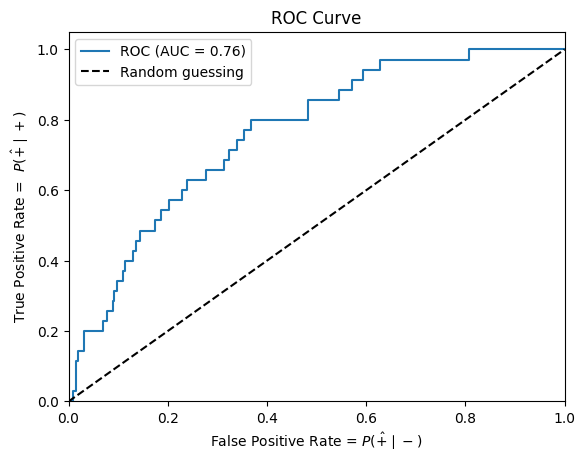

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guessing', color='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate = $P(\hat{+} \mid -)$')
plt.ylabel('True Positive Rate =  $P(\hat{+} \mid +)$')
plt.title('ROC Curve')
plt.legend()
plt.savefig("ROC.eps", format='eps')

In [ ]:
# Excersice build a function that return the better cutoff to a given metric.

Receiver Operating Characteristics (ROC)
